In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * .33

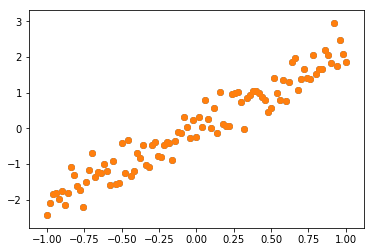

In [6]:
plt.scatter(x_train, y_train)
plt.show()

In [8]:
learning_rate = 0.01
learning_epochs = 100

In [14]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    return tf.mul(X, w)

w = tf.Variable(0.0, "weights")
y_model = model(X, w)

cost = tf.square(Y-y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [21]:
for i in range(learning_epochs):
    for(x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

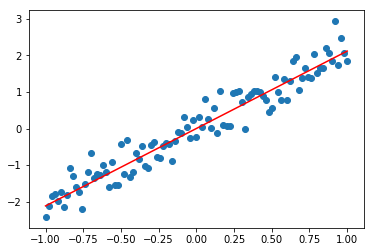

In [23]:
w_val = sess.run(w)
sess.close()
plt.scatter(x_train, y_train)
y_learned = x_train * w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

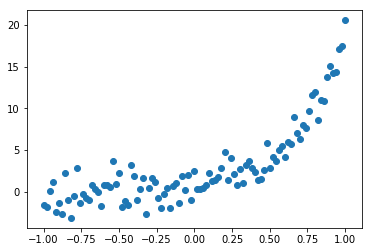

In [26]:
learning_rate = 0.01
learning_epochs = 40

trX = np.linspace(-1, 1, 101)
num_coeffs = 6
trY_coeffs = [1,2,3,4,5,6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)

trY += np.random.randn(*trX.shape) * 1.5
plt.scatter(trX, trY)
plt.show()

In [30]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.mul(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

cost = tf.pow(y_model-Y, 2)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [32]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(learning_epochs):
        for x, y in zip(trX, trY):
            sess.run(train_op, feed_dict={X: x, Y:y})
    
    w_val = sess.run(w)
    print w_val

[ 0.78099048  2.65696096  4.2095809   3.69316149  3.76811242  3.89040256]


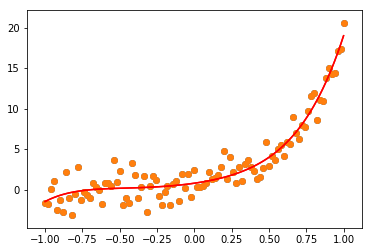

In [35]:
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()